# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [2]:
#импортируем необходимые библиотеки для анализа и визуализации
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# считываем csv файл в датасе
telecom = pd.read_csv('telecom_users.csv', index_col=0)
telecom.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.2,No
5260,2495-KZNFB,Female,0,No,No,33,Yes,Yes,Fiber optic,Yes,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.6,No
6001,4367-NHWMM,Female,0,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,24.90,24.9,No
1480,8898-KASCD,Male,0,No,No,39,No,No phone service,DSL,No,...,Yes,Yes,No,No,One year,No,Mailed check,35.55,1309.15,No
5137,8016-NCFVO,Male,1,No,No,55,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,116.50,6382.55,No


In [4]:
telecom.isna().sum()
# пропущенных данных в датасете нет

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
telecom.info()
# В датасете содержится информация о 5986 пользователях
# большинство данных категориальные, но данные имеют страндартизированные значения, которые можно заменить числовыми
# для проверки построения моделей и их корреляции с Churn (нашим целевым значением, остался клиент или ушел)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1869 to 860
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   object 
 4   Dependents        5986 non-null   object 
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   object 
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   object 
 16  PaperlessBilling  5986 non-null   object

In [6]:
# сгрупируем данные для анализа
telecom[['customerID','Churn']].groupby('Churn').count().reset_index()
# в базе содержится 4399 клиентов действующих и 1587 ушедших

,Churn,customerID
0,No,4399
1,Yes,1587


In [7]:
telecom[['customerID', 'gender','Churn']].groupby(['gender','Churn']).count().reset_index()
# В выборке примерно одинаковое количество мужчин и женщин.Клиентов, которые ушли мужчин и женщин также примерно одинаково,
# поэтому можно сделать вывод, что нет зависимости уйдет клиент или останется по гендерному признаку. 
# Данный параметр статистически не важен и будет исключен из модели.

,gender,Churn,customerID
0,Female,No,2145
1,Female,Yes,791
2,Male,No,2254
3,Male,Yes,796


In [8]:
telecom[['customerID', 'SeniorCitizen','Churn']].groupby(['SeniorCitizen','Churn']).count().reset_index()
# В общей выборке из ушедших клиентов 25% это пенсионеры. Данная группа чаще, чем другие другие клиенты покидают компанию.
# Поэтому можно предполодить, что существует зависимость между уходом клиента и с данной категорией клиентов.

,SeniorCitizen,Churn,customerID
0,0,No,3835
1,0,Yes,1185
2,1,No,564
3,1,Yes,402


In [9]:
telecom[['customerID', 'Partner','Churn']].groupby(['Partner','Churn']).count().reset_index()
# Клиенты, которые не состоят в браке, уходят в 2 раза чаще чем, те которые в браке.
# Поэтому можно предполодить, что существует зависимость между уходом клиента и по клиентам, которые не в браке.

,Partner,Churn,customerID
0,No,No,2071
1,No,Yes,1011
2,Yes,No,2328
3,Yes,Yes,576


In [10]:
telecom[['customerID', 'Dependents','Churn']].groupby(['Dependents','Churn']).count().reset_index()
# Клиенты, у которых нет иждивенцев, уходят значительно чаще чем, у которых их нет.
# Поэтому можно предполодить, что существует зависимость между уходом клиента и отсутсвием иждивенцев.

,Dependents,Churn,customerID
0,No,No,2889
1,No,Yes,1306
2,Yes,No,1510
3,Yes,Yes,281


In [11]:
telecom_contract = telecom[['customerID', 'Contract','Churn']].groupby(['Contract','Churn']).count().reset_index()
telecom_contract
# длинные контракты снижают количество уходов

,Contract,Churn,customerID
0,Month-to-month,No,1871
1,Month-to-month,Yes,1398
2,One year,No,1128
3,One year,Yes,148
4,Two year,No,1400
5,Two year,Yes,41


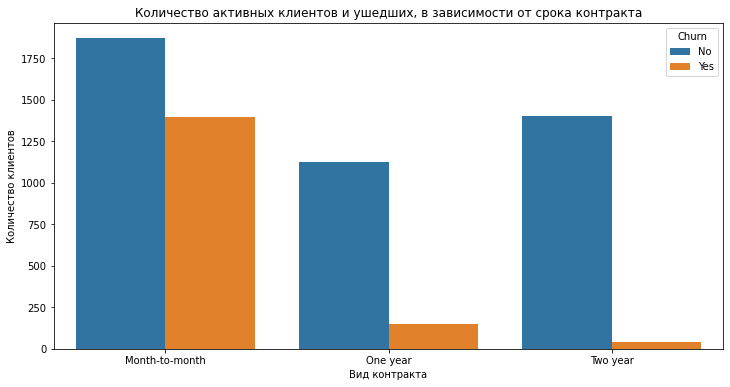

In [12]:
#проиллюстрируем полученные данные
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(x="Contract", y="customerID", hue="Churn", data=telecom_contract)

ax.set_title('Количество активных клиентов и ушедших, в зависимости от срока контракта')
ax.set_xlabel('Вид контракта')
ax.set_ylabel('Количество клиентов')

plt.show()
# зависимость хорошо видна визуально.

In [13]:
telecom_contract_MonthlyCharges = telecom[['MonthlyCharges', 'Contract','Churn']].groupby(['Contract','Churn']).mean().reset_index()
telecom_contract_MonthlyCharges
# клиенты, которые ушли в среднем платили ежемесячно больше, чем клиенты, которые остались

,Contract,Churn,MonthlyCharges
0,Month-to-month,No,61.630385
1,Month-to-month,Yes,72.563054
2,One year,No,62.430585
3,One year,Yes,85.864189
4,Two year,No,60.338750
5,Two year,Yes,86.551220


In [14]:
telecom_PaymentMethod = telecom[['customerID', 'PaymentMethod','Churn']].groupby(['PaymentMethod','Churn']).count().reset_index()
telecom_PaymentMethod 
# При методе оплаты Electronic check - самое большое количество ушедших клиентов, возможно таким клиентам стоит предложить
# другой метод оплаты.

,PaymentMethod,Churn,customerID
0,Bank transfer (automatic),No,1084
1,Bank transfer (automatic),Yes,224
2,Credit card (automatic),No,1105
3,Credit card (automatic),Yes,198
4,Electronic check,No,1104
5,Electronic check,Yes,902
6,Mailed check,No,1106
7,Mailed check,Yes,263


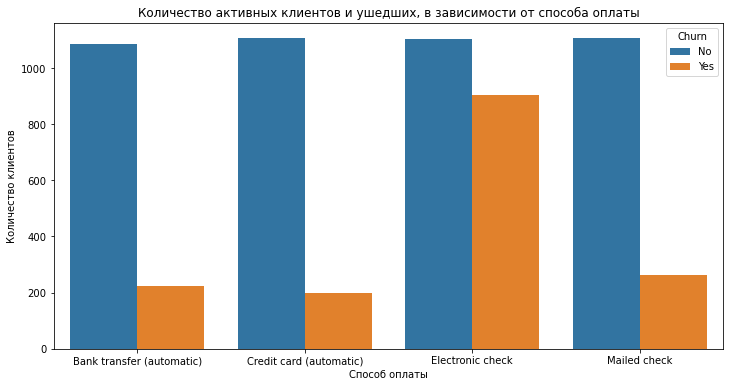

In [15]:
#проиллюстрируем полученные данные
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(x="PaymentMethod", y="customerID", hue="Churn", data=telecom_PaymentMethod)

ax.set_title('Количество активных клиентов и ушедших, в зависимости от способа оплаты')
ax.set_xlabel('Способ оплаты')
ax.set_ylabel('Количество клиентов')

plt.show()
# По визуализации можно предполодить, что существует зависимость между уходом клиента и выбранным способом оплаты.

In [16]:
telecom[['customerID', 'PhoneService','Churn']].groupby(['PhoneService','Churn']).count().reset_index()
# первоначально не наблюдается значительной завимости подключена ли услуга телефонной связи или нет

,PhoneService,Churn,customerID
0,No,No,441
1,No,Yes,149
2,Yes,No,3958
3,Yes,Yes,1438


In [17]:
telecom[['customerID', 'MultipleLines','Churn']].groupby(['MultipleLines','Churn']).count().reset_index()
# первоначально не наблюдается значительной завимости подключена ли услуга MultipleLines или нет

,MultipleLines,Churn,customerID
0,No,No,2133
1,No,Yes,715
2,No phone service,No,441
3,No phone service,Yes,149
4,Yes,No,1825
5,Yes,Yes,723


In [18]:
telecom_InternetService = telecom[['customerID', 'InternetService','Churn']].groupby(['InternetService','Churn']).count().reset_index()
telecom_InternetService
# у интернет провайдера Fiber optic - самое большое количество уходов, возможно стоит обратить внимание на качество или 
# набора услуг данным провайдером

,InternetService,Churn,customerID
0,DSL,No,1671
1,DSL,Yes,397
2,Fiber optic,No,1536
3,Fiber optic,Yes,1091
4,No,No,1192
5,No,Yes,99


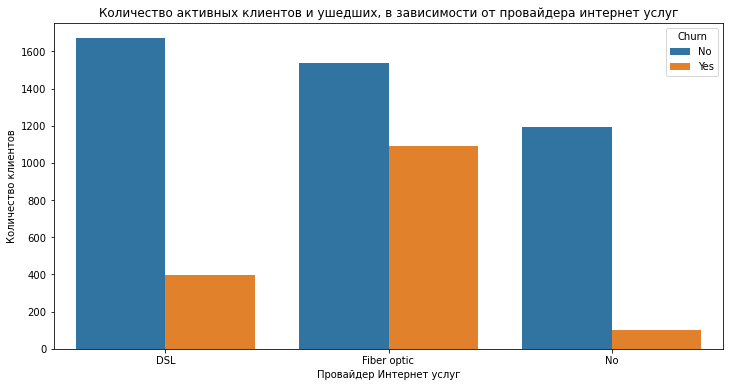

In [19]:
#проиллюстрируем полученные данные
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(x="InternetService", y="customerID", hue="Churn", data=telecom_InternetService)

ax.set_title('Количество активных клиентов и ушедших, в зависимости от провайдера интернет услуг')
ax.set_xlabel('Провайдер Интернет услуг')
ax.set_ylabel('Количество клиентов')

plt.show()
# По визуализации можно предполодить, что существует зависимость между уходом клиента и выбранным интернет провайдером.

In [20]:
telecom[['customerID', 'OnlineSecurity','Churn']].groupby(['OnlineSecurity','Churn']).count().reset_index()
# среди клиентов, у которых не подключена услуга OnlineSecurity уходы просиходят значительно чаще

,OnlineSecurity,Churn,customerID
0,No,No,1740
1,No,Yes,1242
2,No internet service,No,1192
3,No internet service,Yes,99
4,Yes,No,1467
5,Yes,Yes,246


In [21]:
telecom[['customerID', 'OnlineBackup','Churn']].groupby(['OnlineBackup','Churn']).count().reset_index()
# среди клиентов, у которых не подключена услуга OnlineBackup уходы происходят значительно чаще

,OnlineBackup,Churn,customerID
0,No,No,1567
1,No,Yes,1038
2,No internet service,No,1192
3,No internet service,Yes,99
4,Yes,No,1640
5,Yes,Yes,450


In [22]:
telecom[['customerID', 'DeviceProtection','Churn']].groupby(['DeviceProtection','Churn']).count().reset_index()
# среди клиентов, у которых не подключена услуга DeviceProtection уходы происходят значительно чаще

,DeviceProtection,Churn,customerID
0,No,No,1609
1,No,Yes,1031
2,No internet service,No,1192
3,No internet service,Yes,99
4,Yes,No,1598
5,Yes,Yes,457


In [23]:
telecom[['customerID', 'TechSupport','Churn']].groupby(['TechSupport','Churn']).count().reset_index()
# среди клиентов, у которых не подключена услуга TechSupport уходы происходят значительно чаще

,TechSupport,Churn,customerID
0,No,No,1738
1,No,Yes,1222
2,No internet service,No,1192
3,No internet service,Yes,99
4,Yes,No,1469
5,Yes,Yes,266


In [24]:
telecom[['customerID', 'StreamingTV','Churn']].groupby(['StreamingTV','Churn']).count().reset_index()
# первоначально не наблюдается значительной завимости подключена ли услуга StreamingTV или нет

,StreamingTV,Churn,customerID
0,No,No,1590
1,No,Yes,799
2,No internet service,No,1192
3,No internet service,Yes,99
4,Yes,No,1617
5,Yes,Yes,689


In [25]:
telecom[['customerID', 'StreamingMovies','Churn']].groupby(['StreamingMovies','Churn']).count().reset_index()
# первоначально не наблюдается значительной завимости подключена ли услуга StreamingMovies или нет

,StreamingMovies,Churn,customerID
0,No,No,1564
1,No,Yes,792
2,No internet service,No,1192
3,No internet service,Yes,99
4,Yes,No,1643
5,Yes,Yes,696


In [26]:
# преобразуем строковые данные в числовые, для дальнейшей проверки проверки корреляции, и построения моделей
telecom_num = telecom

In [27]:
# customerID удалим как не несущий значимой информации
telecom_num = telecom_num.drop('customerID', axis = 1)

# TotalCharges преобразуем в float
telecom_num['TotalCharges'] = pd.to_numeric(telecom_num['TotalCharges'],errors='coerce').fillna(0)

# Целевую переменную преобразуем в Yes - 1 0 No - 0
telecom_num['Churn'] = telecom_num['Churn'].map({'Yes': 1, 'No': 0})

In [28]:
# выбор колонок с типом object
cat_columns = telecom_num.select_dtypes(['object']).columns

# преобразование в тип category
telecom_num[cat_columns] = telecom_num[cat_columns].astype('category')

# замена тип category на integers
telecom_num[cat_columns] = telecom_num[cat_columns].apply(lambda x: x.cat.codes)

In [29]:
telecom_num.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10,1734.65,0
4528,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15,3973.20,0
6344,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95,2869.85,1
6739,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90,238.50,0
432,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45,119.50,0


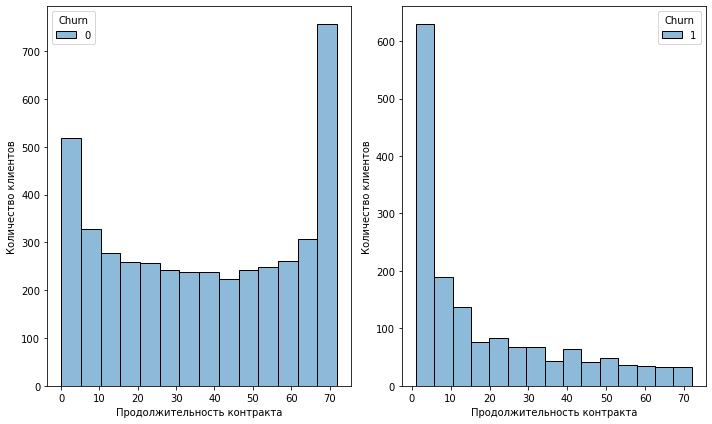

In [30]:
# Столбец tenure изобразим на гистограмме, разделив на клиентов, которые в компании и которые ушли
# Определение основных объектов диаграммы, количество строк, столбцов, размер графика
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# В цикле строим 2 графиков
for index, ax in enumerate(axes.flat):
    # Вывод графика на страницу
    sns.histplot(x="tenure", hue="Churn", data=telecom_num[telecom_num["Churn"]==index], ax=ax)

    # Подписание заголовка и осей координат
#     ax.set_title(course.iloc[index])
    ax.set_xlabel('Продолжительность контракта')
    ax.set_ylabel('Количество клиентов')

# Автоматическое позиционирование элементов графика
fig.tight_layout()

# Отображение графика на странице
plt.show()
#по гисторграмме видно, что основная доля более 600 клиентов ушла, до 5 месяцев срока контракта,
# еще около 200 от 5 до 10 месяцев. Можно предположить, что лояльность к компани возникает или нет за этот период времени. 

# 2. Исследование зависимостей и формулирование гипотез

<AxesSubplot:>

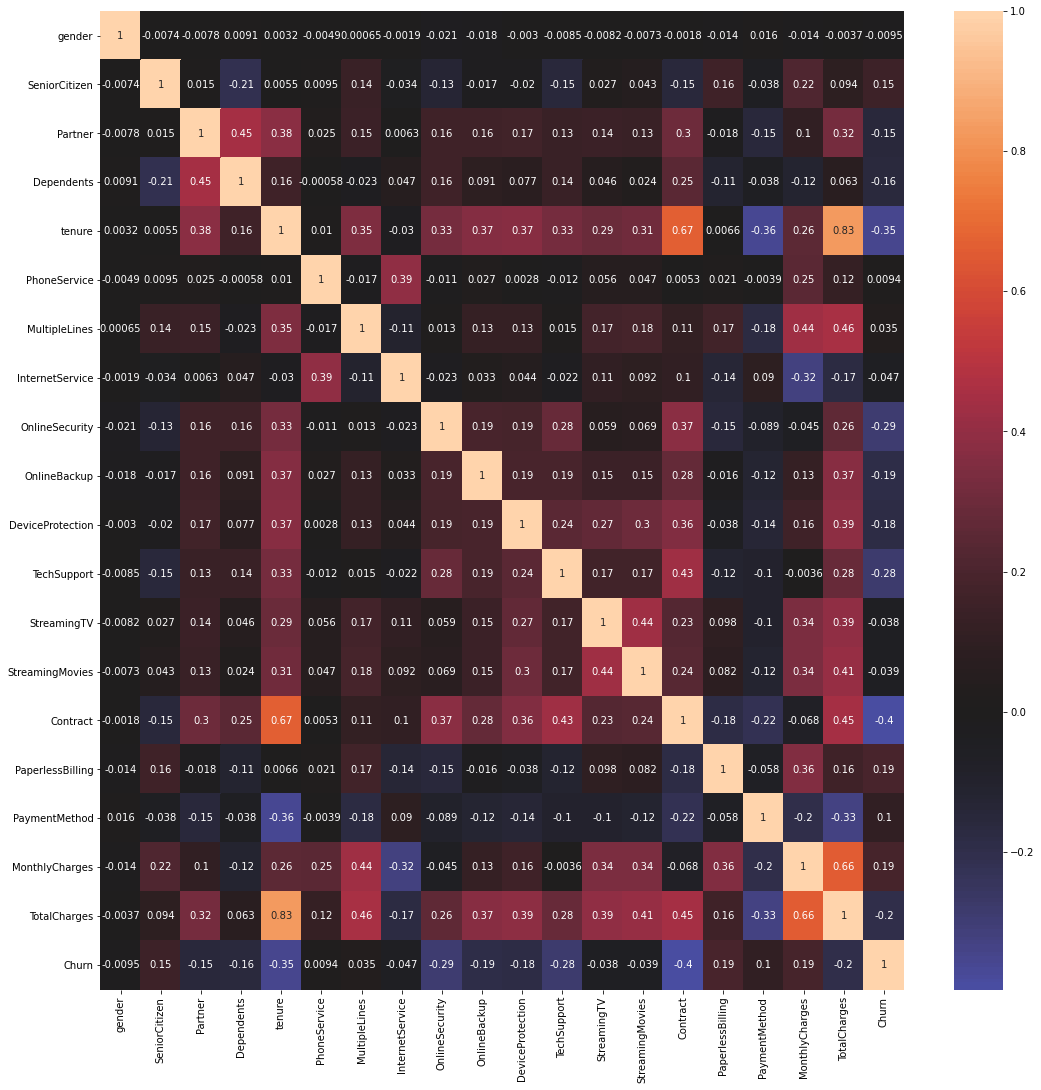

In [31]:
# построим heatmap для опредления степени заивимости перемнных друг от друга
corr_m = telecom_num.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr_m, center=0, annot=True)

# На основании heatmap подведем первичные выводы и начнем отбирать переменные для модели:
# С целевой колонкой Churn наблюдается максимум уменная зависимость по:
# 1) признаку tenure (сколько месяцев человек являлся клиентом компании) - мы это уже наблюдали ранее (потверждает гипотезу),
# что чем дольше времени клиенты с компанией, тем меньше клентов уходит
# 2) признаку Contract (тип контракта клиента (Month-to-month, One year, Two year)) - так же наблюдали (потверждает гипотезу),
# чем длинее контакт у клиента, тем меньше вероятность ухода клиента

# Также в модель включим:
# 1) признаки OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport - имеют зависимость 0.18-0.29 -  
# использование дополнительных услуг, похоже повышает лояльность к компании. 
# 2) PaymentMethod Electronic check имеете высокое количество уходов клиентов, поэтому так же включим в модель
# 3) MonthlyCharges и TotalCharges. Так же включим в модель, причем они обратно влият на целевую переменную.
# 4) признак InternetService также включим в модель, так как наблюдали ранее зависимость от интернет провайдера

# Удалим из построения модели (как почти не влиящие на целевое значение) gender, PhoneService, MultipleLines,
# StreamingTV, StreamingMovies, PaperlessBilling (не важный для проблемы, которую решаем)

In [32]:
# удаляем столбцы gender, PhoneService, MultipleLines, StreamingTV, StreamingMovies, PaperlessBilling
telecom_model = telecom_num.drop(['gender', 'PhoneService', 'MultipleLines', 'StreamingTV',
                                  'StreamingMovies','PaperlessBilling'], axis=1)
telecom_model.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1869,0,1,1,72,2,1,1,1,1,2,1,24.10,1734.65,0
4528,0,0,0,44,1,0,2,2,0,0,1,88.15,3973.20,0
6344,1,1,0,38,1,0,0,0,0,0,0,74.95,2869.85,1
6739,0,0,0,4,0,0,0,0,0,0,2,55.90,238.50,0
432,0,0,0,2,0,2,0,2,0,0,2,53.45,119.50,0


# 3. Построение моделей для прогнозирования оттока

In [33]:
# модуль warnings для фильтрации предупреждений
import warnings
warnings.filterwarnings('ignore')

#ипортируем интрументы для поиска лучших парметров, разбиения и валидации выборки
from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold)

#импортируем модели базовых алгоритмов GradientBoostingClassifier, RandomForestClassifier, LogisticRegression, которые хорошо 
# для бинарной классификации
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#импортируем модель мета алгоритма xgboost
from xgboost import XGBClassifier

# параметры базовых алгоритмов
gbc_params = {'learning_rate': np.arange(0.1, 0.6, 0.1)} # GradientBoostingClassifier

rfc_params = {'n_estimators': range(10, 100, 10), # RandomForestClassifier
              'min_samples_leaf': range(1, 5)}

lr_params = {'C': np.arange(0.5, 1, 0.1)} #LR

skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)

In [34]:
# В качестве базовых алгоритмов используем RandomForestClassifier, GradientBoostingClassifier и LogisticRegression;
#в качестве мета-алгоритма - XGBoost.
targets = telecom_model.Churn
telecom_data = telecom_model.drop(columns='Churn')

# разделим выборку на тренировочные и тестовые данные
x_train, x_test, y_train, y_test = train_test_split(telecom_data, 
                                                    targets,
                                                    test_size=0.3,
                                                    random_state=17)

# создадим экземпляры базовых алгоритмов
rfc = RandomForestClassifier(random_state=17)
gbc = GradientBoostingClassifier(random_state=17)
lr = LogisticRegression(random_state=17)

In [35]:
# разделим новую выборку на тренировочные и тестовые данные
x_train, x_test, y_train, y_test = train_test_split(telecom_data, 
                                                    targets,
                                                    test_size=0.3,
                                                    random_state=17)

In [36]:
# займемся поиском оптимальных параметров для наших базовых моделей с промощью GridSearchCV
# RandomForestClassifier best_params_
rfc_grid = GridSearchCV(rfc, rfc_params, cv=skf)
rfc_grid_fit = rfc_grid.fit(x_train, y_train)
rfc_grid_fit.best_params_

{'min_samples_leaf': 3, 'n_estimators': 80}

In [37]:
# предсказания по RandomForestClassifier
rfc_grid_pred = rfc_grid_fit.predict(x_train)

In [38]:
# GradientBoostingClassifier best_params_
gbc_grid = GridSearchCV(gbc, gbc_params, cv=skf)
gbc_grid_fit = gbc_grid.fit(x_train, y_train)
gbc_grid_fit.best_params_

{'learning_rate': 0.1}

In [39]:
# предсказания по GradientBoostingClassifier
gbc_grid_pred = gbc_grid_fit.predict(x_train)

In [40]:
# LogisticRegression best_params_
lr_grid = GridSearchCV(lr, lr_params, cv=skf)
lr_grid_fit = lr_grid.fit(x_train, y_train)
lr_grid_fit.best_params_

{'C': 0.6}

In [41]:
# предсказания по LogisticRegression
lr_grid_pred = lr_grid_fit.predict(x_train)

In [53]:
# построим стекинг для всех моделей с наилучшими подобранными параметрами.
# собираем модели с лучшим параметрами
rfc_bp = RandomForestClassifier(**rfc_grid_fit.best_params_, random_state=17)
gbc_bp = GradientBoostingClassifier(learning_rate=gbc_grid_fit.best_params_['learning_rate'], random_state=17)
lr_bp = LogisticRegression(**lr_grid_fit.best_params_, random_state=17)

In [95]:
# мета модель на основе XGBClassifier
meta = XGBClassifier(random_state=17) #objective= 'binary:logistic', 

In [96]:
# параметры для мета модели
xgb_params = {'n_estimators': range(10, 100, 5),
              'eta': np.arange(0.1, 1., .1),
              'min_child_weight': range(1, 10, 1),
              'subsample': np.arange(0.1, 1., 0.2)}

In [112]:
# очень медленно работает!!! не использовал
params = {'final_estimator__eta': np.arange(0.1, 0.4, .1)}
grid_xgb = GridSearchCV(estimator=stacking, param_grid=params, cv=skf, n_jobs=-1, verbose=True, scoring='roc_auc')
grid_xgb_fit = grid_xgb.fit(x_train, y_train)
grid_xgb_fit.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[15:38:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'final_estimator__eta': 0.1}

In [113]:
# модель с GridSearchCV
xgb_grid = GridSearchCV(meta, xgb_params, cv=skf, n_jobs=-1, verbose=True, scoring='roc_auc')

In [114]:
# соберем все предсказания
predictions = [rfc_grid_pred, gbc_grid_pred, lr_grid_pred]

# пустая матрица размера x_train
meta_mtrx_train = np.empty((x_train.shape[0], len(predictions)))

# заполняем матрицу предсказаниями базовых алгоритмов
for n, model_pred in enumerate(predictions):
    meta_mtrx_train[:, n] = model_pred

In [115]:
# Мета XGBClassifier best_params
xgb_grid_fit = xgb_grid.fit(meta_mtrx_train, y_train)
xgb_grid_fit.best_params_

Fitting 5 folds for each of 7290 candidates, totalling 36450 fits
[16:44:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'eta': 0.7000000000000001,
 'min_child_weight': 2,
 'n_estimators': 90,
 'subsample': 0.5000000000000001}

In [116]:
# мета модель с лучшим параметрами
final_estimator = XGBClassifier(**xgb_grid_fit.best_params_, random_state=17)

In [117]:
estimators = [('rfc', rfc_bp),
              ('gbc', gbc_bp),
              ('lr', lr_bp)]

In [118]:
# импорт StackingClassifier
from sklearn.ensemble import StackingClassifier

# инициализируем модель
stacking = StackingClassifier(estimators=estimators, final_estimator=final_estimator, stack_method='predict')

# 4. Сравнение качества моделей 

In [119]:
print(f'RandomForestClassifier score test: {rfc_bp.fit(x_train, y_train).score(x_test, y_test)}')

RandomForestClassifier score test: 0.7928730512249443


In [120]:
print(f'GradientBoostingClassifier score test: {gbc_bp.fit(x_train, y_train).score(x_test, y_test)}')

GradientBoostingClassifier score test: 0.7984409799554566


In [123]:
print(f'LogisticRegression score test: {lr_bp.fit(x_train, y_train).score(x_test, y_test)}')

LogisticRegression score test: 0.7867483296213809


In [122]:
print(f'Stacking score test: {stacking.fit(x_train, y_train).score(x_test, y_test)}')

[16:52:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Stacking score test: 0.7934298440979956


In [ ]:
# Выводы по работе:
# Выбранные модели показали достаточно высокую точность на тестовых данных почти 80%. Для базовой для определения ухода 
# клиента стоит предложить модель GradientBoostingClassifier по критериям точности и скорости работы.
# Целесообразности использования Stacking нет - тяжелая модель и не увеличивает качество прогноза.

# В ходе работы наблюдалась уменная зависимость по уходу клиента или нет с:
# 1) признаком tenure (сколько месяцев человек являлся клиентом компании) - можно сделать вывод, чем дольше времени клиенты
# с компанией, тем меньше клентов уходит. А вот на первичных сроках от 0 до 10 месяцев, компании стоит чаще собирать обратную
# связь и при необходимости предлагалать спец условия.
# 2) признаку Contract (тип контракта клиента (Month-to-month, One year, Two year)) - можно сделать вывод, чем длинее контакт
# у клиента, тем меньше вероятность ухода клиента. То есть клиентам Month-to-month предлагать переход на длинные контракты на
# более выгодных условиях. 

# Также при анализе данных можно предложить следующие рекомендации:
# 1) подключенные доп. услуги (OnlineSecurity, OnlineBackup,DeviceProtection,TechSupport) коррелируют с клиентами, которые 
# остаются. То есть для клиентов, которые потенциально могут уйти, нужно оптимизировать перечень данных услуг (возможно что-то
# бесплатно предоставить, тем самым повысить лояльность)
# 2) Клиенты, которые ушли в среднем платили ежемесячно больше, чем клиенты, которые остались. Стоит проанализировать
# тарифы скорее всего части клиентам не успели предложить интересные для его условия, что могло быть причиной его ухода.
# 3) Клиенты пенсионеры чаще, чем остальные клиенты покидали компанию. Предложить спец тарифы, для данной категории колиентов.
# 4) При методе оплаты Electronic check - самое большое количество ушедших клиентов, таким клиентам стоит предложить
# другой метод оплаты.
# 5) У интернет провайдера Fiber optic - самое большое количество уходов, стоит обратить внимание на качество или 
# набора услуг данным провайдером
# 6) Клиенты, которые не состоят в браке и без иждивенцев, чаще склонны к уходу. Возможно они чаще переезжают, например, со 
# съемных квартир и есть проблемы по переносу услуг в новую квартиру, новый район. Может ли компания что-то предложить
# для часто переезжающих?